# Breast Cancer Prediction

## Importing the libraries

In [63]:
import pandas as pd
import numpy as np

## Importing the dataset

In [64]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [65]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [66]:
dataset.shape

(683, 11)

In [67]:
dataset.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [68]:
column_names_for_X = dataset.columns[1:-1].tolist()
print("The column names for X are:")
print(column_names_for_X)

The column names for X are:
['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']


In [69]:
column_names_for_y = dataset.columns[[-1]].tolist()
print("The column names for y are:")
print(column_names_for_y)

The column names for y are:
['Class']


## Splitting the dataset into the Training set and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [71]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [72]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [73]:
y_pred_lr = classifier_lr.predict(X_test)

In [74]:
print(classifier_lr.predict(sc.transform([[5,1,1,1,2,1,3,1,1]])))

[2]


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for Logistic Regression:")
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nAccuracy (Logistic Regression):", accuracy_lr)
#Recall
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
print("\nRecall (Logistic Regression):", recall_lr)
#Precision
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
print("\nPrecision (Logistic Regression):",precision_lr)
#F1 Score
f1_lr = f1_score(y_test,y_pred_lr, average='weighted')
print("\nF1 Score (Logistic Regression):",f1_lr)
#Classification Report
report_lr = classification_report(y_test, y_pred_lr)
print("\nClassification Report(Logistic Regression):\n",report_lr)

Confusion Matrix for Logistic Regression:
[[84  3]
 [ 3 47]]

Accuracy (Logistic Regression): 0.9562043795620438

Recall (Logistic Regression): 0.9562043795620438

Precision (Logistic Regression): 0.9562043795620438

F1 Score (Logistic Regression): 0.9562043795620438

Classification Report(Logistic Regression):
               precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [76]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.97 %


## Training the KNN model on the Training set

In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred_knn = classifier_knn.predict(X_test)

In [79]:
print(classifier_knn.predict(sc.transform([[5,1,1,1,2,1,3,1,1]])))

[2]


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for KNN:")
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy (KNN):", accuracy_knn)
#Recall
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print("\nRecall (KNN):", recall_knn)
#Precision
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
print("\nPrecision (KNN):",precision_knn)
#F1 Score
f1_knn = f1_score(y_test,y_pred_knn, average='weighted')
print("\nF1 Score (KNN):",f1_knn)
#Classification Report
report_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report(KNN):\n",report_knn)

Confusion Matrix for KNN:
[[83  4]
 [ 2 48]]

Accuracy (KNN): 0.9562043795620438

Recall (KNN): 0.9562043795620438

Precision (KNN): 0.9569838491263996

F1 Score (KNN): 0.9563791226896463

Classification Report(KNN):
               precision    recall  f1-score   support

           2       0.98      0.95      0.97        87
           4       0.92      0.96      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



In [81]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard Deviation: 1.79 %


## Training the Supper Vector Machine model on the Training set

In [82]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [83]:
y_pred_svm = classifier_svm.predict(X_test)

In [84]:
print(classifier_svm.predict(sc.transform([[5,1,1,1,2,1,3,1,1]])))

[2]


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for SVM:")
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nAccuracy (SVM):", accuracy_svm)
#Recall
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
print("\nRecall (SVM):", recall_svm)
#Precision
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
print("\nPrecision (SVM):",precision_svm)
#F1 Score
f1_svm = f1_score(y_test,y_pred_svm, average='weighted')
print("\nF1 Score (SVM):",f1_svm)
#Classification Report
report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report(SVM):\n",report_svm)

Confusion Matrix for SVM:
[[83  4]
 [ 2 48]]

Accuracy (SVM): 0.9562043795620438

Recall (SVM): 0.9562043795620438

Precision (SVM): 0.9569838491263996

F1 Score (SVM): 0.9563791226896463

Classification Report(SVM):
               precision    recall  f1-score   support

           2       0.98      0.95      0.97        87
           4       0.92      0.96      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



In [86]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svm, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.07 %
Standard Deviation: 2.19 %


## Training the Random Forest Classifier model on the Training set

In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [88]:
y_pred_rf = classifier_rf.predict(X_test)

In [89]:
print(classifier_rf.predict(sc.transform([[5,1,1,1,2,1,3,1,1]])))

[2]


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for Random Forest:")
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy (Random Forest):", accuracy_rf)
#Recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print("\nRecall (Random Forest):", recall_rf)
#Precision
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
print("\nPrecision (Random Forest):",precision_rf)
#F1 Score
f1_rf = f1_score(y_test,y_pred_rf, average='weighted')
print("\nF1 Score (Random Forest):",f1_rf)
#Classification Report
report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report(Random Forest):\n",report_rf)

Confusion Matrix for Random Forest:
[[83  4]
 [ 3 47]]

Accuracy (Random Forest): 0.948905109489051

Recall (Random Forest): 0.948905109489051

Precision (Random Forest): 0.9492229755592612

F1 Score (Random Forest): 0.9490103813976184

Classification Report(Random Forest):
               precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



In [91]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.34 %
Standard Deviation: 2.16 %


## Training the Decision Tree Classifier model on the Training set

In [92]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [93]:
y_pred_dt = classifier_dt.predict(X_test)

In [94]:
print(classifier_dt.predict(sc.transform([[5,1,1,1,2,1,3,1,1]])))

[2]


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for Decision Tree:")
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nAccuracy (Decision Tree):", accuracy_dt)
#Recall
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print("\nRecall (RDecision Tree):", recall_dt)
#Precision
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
print("\nPrecision (Decision Tree):",precision_dt)
#F1 Score
f1_dt = f1_score(y_test,y_pred_dt, average='weighted')
print("\nF1 Score (Decision Tree):",f1_dt)
#Classification Report
report_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report(Decision Tree):\n",report_dt)

Confusion Matrix for Decision Tree:
[[84  3]
 [ 3 47]]

Accuracy (Decision Tree): 0.9562043795620438

Recall (RDecision Tree): 0.9562043795620438

Precision (Decision Tree): 0.9562043795620438

F1 Score (Decision Tree): 0.9562043795620438

Classification Report(Decision Tree):
               precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [96]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.33 %
Standard Deviation: 2.65 %


## Final Model selected is KNN with an Accuracy of 96.70% with a Standard Deviation of 1.79%

### 2 - Benign (Not Dangerous)   

### 4 - Malignant (Dangerous)

In [97]:
#example 1
print(classifier_knn.predict(sc.transform([[7,3,4,2,2,1,3,2,1]])))

[2]


In [98]:
#example 2
print(classifier_knn.predict(sc.transform([[8,10,9,8,7,6,9,7,1]])))

[4]


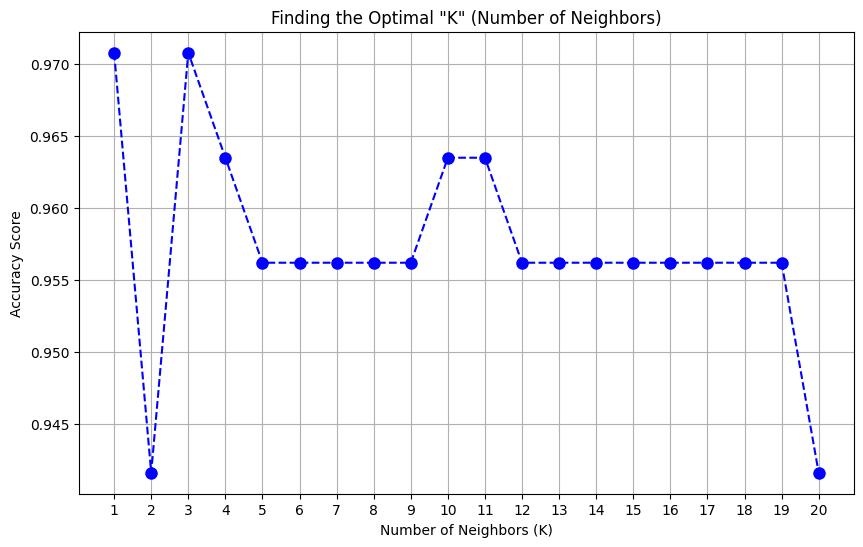

In [99]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Test K values from 1 to 20
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# 2. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='--', color='blue', markersize=8)
plt.title('Finding the Optimal "K" (Number of Neighbors)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()